In [1]:
from MiniTorch.tensor import Tensor, Parameter
from MiniTorch.functions import relu
from MiniTorch.visualizer import trace, build_graph

In [2]:
class Model:
    def __init__(self):
        self.layers = [
            Parameter(1, 1),
        ]

    def __call__(self, x):
        if not isinstance(x, Tensor):
            x = Tensor(x)
        
        out = x
        for layer in self.layers:
            out = layer(out)

        return out
    
    def __repr__(self):
        s = []
        for layer in self.layers:
            s.append(f"{layer.data = } | {layer.grad = }")
        
        return "\n".join(s)

In [3]:
def mse(x: Tensor, y):
    out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")
    
    def _backward():
        x.grad += (y - x.data) * out.grad
        
    
    out._backward = _backward
    return out

In [4]:
nn = Model()
nn

layer.data = array([[2.61986044]]) | layer.grad = array([[0.]])

In [5]:
import numpy as np

In [6]:
train_data = np.array(list(zip(
    np.arange(1, 100),
    2 * np.arange(1, 100)
)))

In [7]:
test_data = train_data

In [8]:
epochs = 10

/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


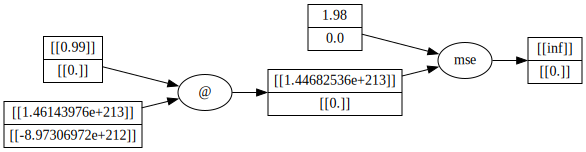

epoch = 0 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


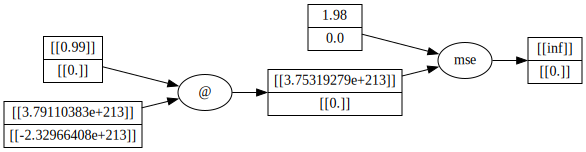

epoch = 1 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


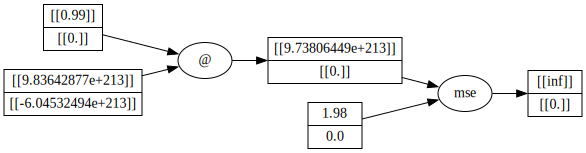

epoch = 2 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


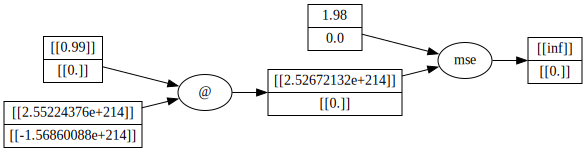

/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


epoch = 3 | loss = array([[inf]])


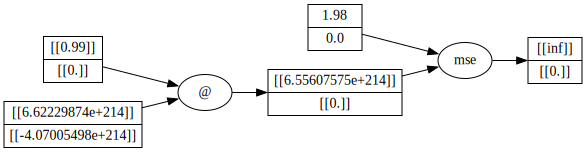

/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


epoch = 4 | loss = array([[inf]])


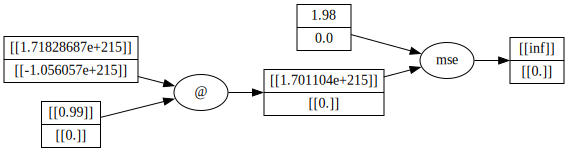

/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


epoch = 5 | loss = array([[inf]])


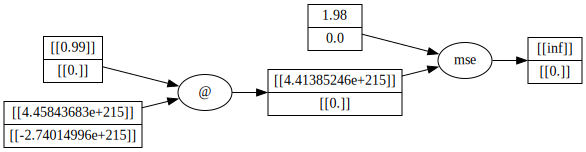

/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


epoch = 6 | loss = array([[inf]])


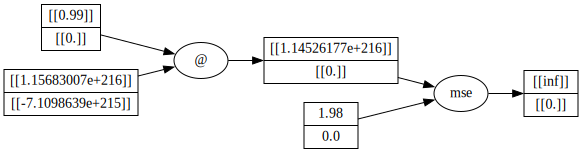

epoch = 7 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


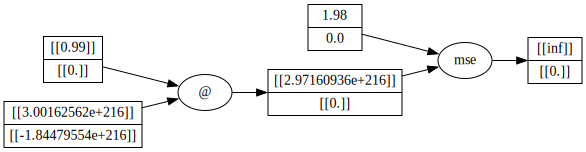

epoch = 8 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad
/tmp/ipykernel_22551/3365889277.py:2: RuntimeWarning: overflow encountered in square
  out = Tensor(0.5 * (x.data - y) ** 2, _children = (x,Tensor(y)), _op = "mse")


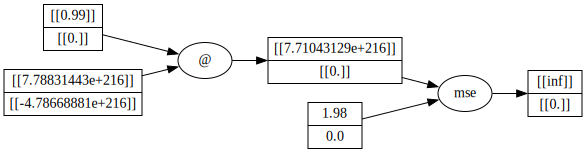

epoch = 9 | loss = array([[inf]])


/home/abderrahim/Git/MyTorch/MiniTorch/tensor.py:38: RuntimeWarning: overflow encountered in multiply
  other.grad += self.data.T * out.grad


In [11]:
for epoch in range(epochs):
    loss = 0
    
    for layer in nn.layers:
    
    for x, y in train_data:
        x, y = x / 100, y / 100
        out = nn([[x]])
        out = mse(out, y)
        loss += 0.5 * (out.data - y) ** 2

    
    nodes, edges = trace(out)
    display(build_graph(nodes, edges))
    
    out.backward()
    for layer in nn.layers:
        layer.data -= layer.grad

    loss = loss / len(train_data)
    print(f"{epoch = } | {loss = }")

In [10]:
nn([[2]])

Tensor(data = [[2.92287951e+213]], _children = (Tensor(data = [[1.46143976e+213]], _children = (), _op = None), Tensor(data = [[2]], _children = (), _op = None)), _op = @)